## NAC1 Python e OpenCV

*   Existe mais de uma forma de chegar na solução da NAC, vou tentar mostra um caminho. 


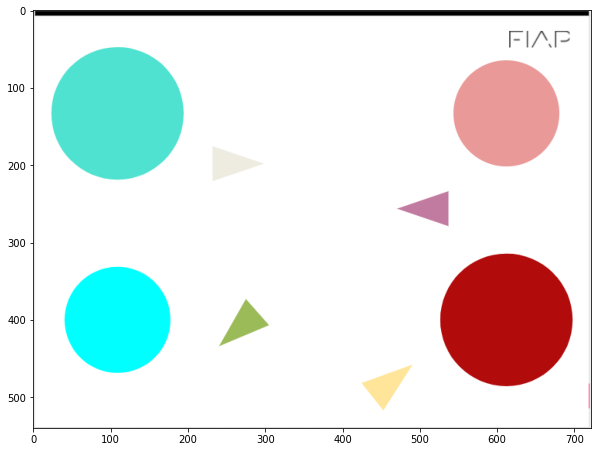

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('circulo.png')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img2); plt.show()

[[[613.  399.   85. ]
  [107.  133.   85.6]]]


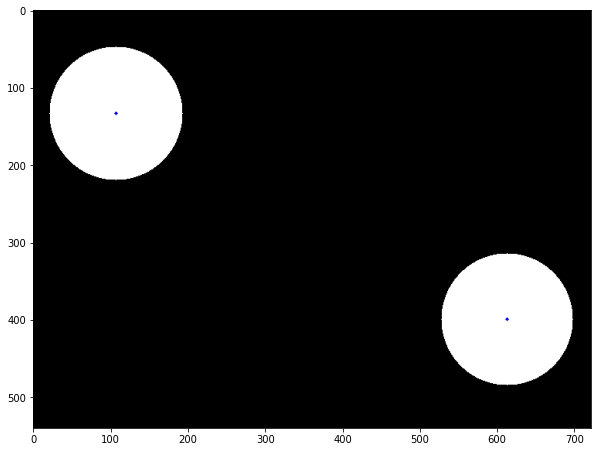

In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150)

circles=cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,dp=2,minDist=40,param1=200,param2=100,minRadius=75,maxRadius=90)
print(circles)
output = np.zeros((edges.shape[0],edges.shape[1],3), np.uint8) #cria uma imagem em preto para limpar o fundo 


if circles is not None:        
    circles = np.uint16(np.around(circles))
    for i in circles[0, : ]:
        # desenha o contorno do circulo
        cv2.circle(output,(i[0],i[1]),i[2],(255,255,255),-1)
        # desenha no centro do circulo
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),-1)


plt.figure(figsize = (10,10))
plt.imshow(output); plt.show()

In [10]:
ponto1x,ponto1y = (circles[0][0][0],circles[0][0][1])
ponto2x,ponto2y = (circles[0][1][0],circles[0][1][1])

#pi*r*r
area1 = circles[0][0][2]*circles[0][0][2]*math.pi
area2 = circles[0][1][2]*circles[0][1][2]*math.pi
area2 =  pow(circles[0][1][2],2)*math.pi

print ("circulo 1 centro com coordenadas x: {}, y: {}, area: {}".format(ponto1x,ponto1y,area1))
print ("circulo 2 centro com coordenadas x: {}, y: {}, area: {}".format(ponto2x,ponto2y,area2))


circulo 1 centro com coordenadas x: 613, y: 399, area: 22698.006922186254
circulo 2 centro com coordenadas x: 107, y: 133, area: 23235.21926595011


Angulo: 27.730532237878066


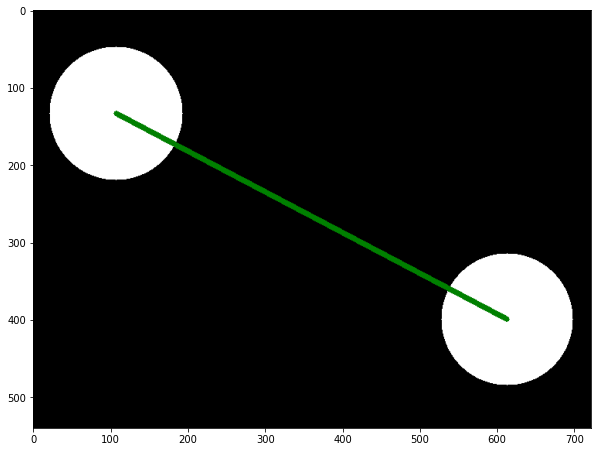

In [11]:
#desenha linha
cv2.line(output,(ponto1x,ponto1y),(ponto2x,ponto2y),(0,128,0),5)


## calcula angulo

rad = math.atan2(ponto1y - ponto2y, ponto1x - ponto2x)
graus = math.degrees(rad)

#deltax = abs(abs(ponto1x) - abs(ponto2x))
#deltay = abs(ponto1y - ponto2y)

#anglerad = np.arctan2(abs(ponto1x - ponto2x), abs(ponto1y - ponto2y))
#angledec = np.rad2deg(anglerad) 

print("Angulo: {}".format(graus))

plt.figure(figsize = (10,10))
plt.imshow(output); plt.show()

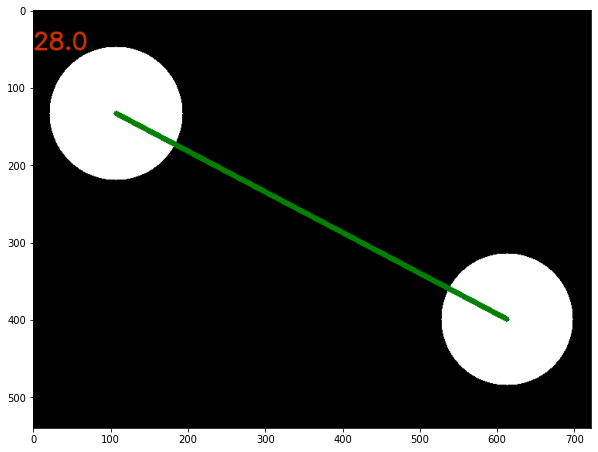

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U1')) -> None

In [12]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = np.round(graus)
origem = (0,50)

cv2.putText(output, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)
plt.figure(figsize = (10,10))
plt.imshow(output); plt.show()
print(str(np.round(graus) + '°'))
# Filename
#filename = 'circulo-resultado.jpg'
  
# Using cv2.imwrite() method
# Saving the image
#cv2.imwrite(filename, output)

## R1 e R2 por cor e contorno

In [13]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# Programa simples com camera webcam e opencv
import cv2
import numpy as np
import math

#filtro amarelo

image_lower_amarelo = np.array([30,50,70])
image_upper_amarelo = np.array([50,255,255])


#filtro magenta
image_lower_mag = np.array([140,50,80])
image_upper_mag = np.array([180,255,225])




def image_da_webcam(img):
    """
    ->>> !!!! FECHE A JANELA COM A TECLA ESC !!!! <<<<-
        deve receber a imagem da camera e retornar uma imagems filtrada.
    """
    img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)  
    saida = cv2.cvtColor(img,cv2.COLOR_HSV2BGR)

    
    #mascara 
    mask1 = cv2.inRange(img, image_lower_amarelo, image_upper_amarelo)
    mask2 = cv2.inRange(img, image_lower_mag, image_upper_mag)
    
    mask_res = cv2.bitwise_or(mask1, mask2)
    
    contornos, _ = cv2.findContours(mask_res, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
    contornos_ord = sorted(contornos, key=cv2.contourArea, reverse= True)

    # Identificando os contornos para uso posterior de calculo da área
    mascara_rgb = cv2.cvtColor(mask_res, cv2.COLOR_GRAY2RGB)
    
    # For para calcular a área e o CM, e imprimir na imagem de acordo com a posição do eixo X do CM,\n",
    # para que cada informação fique do lado do circulo correspondente\n",
    cxV = []
    cyV = []
    for i in contornos_ord[0:2]:

        area = cv2.contourArea(i)
            
        M = cv2.moments(i)
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            cxV.append(cx)
            cyV.append(cy)

            tamnho = 20
            cor = (0,0,0)
            cv2.line(saida,(cx - tamnho,cy),(cx + tamnho,cy),cor,5)
            cv2.line(saida,(cx,cy - tamnho),(cx, cy + tamnho),cor,5)
            fonte = cv2.FONT_HERSHEY_SIMPLEX
            texto = cx, cy, area
            if cx <200:
                origem = (cx,cy+50)
            else:
                origem = (cx,cy-50)
        
            cv2.putText(saida, str(texto), origem, fonte,1,(0,0,0),2,cv2.LINE_AA)
    
            # Traça a reta
            cor = (0, 0, 0)
            vetorTamanho = len(cxV)
            cv2.line(saida,(cxV[0],cyV[0]), (cxV[vetorTamanho-1], cyV[vetorTamanho-1]),cor,5)
        
            # Calcula e imprime o ângulo da reta\n",
            fonte = cv2.FONT_HERSHEY_SIMPLEX
            cxT = cxV[0]-cxV[vetorTamanho-1]
            cyT = cyV[0]-cyV[vetorTamanho-1]

            angulo = math.atan2(cyV[0]-cyV[vetorTamanho-1],cxV[0]-cxV[vetorTamanho-1])
            texto = str(round(math.degrees(angulo), 2))
            origem = (150,150)
            cv2.putText(saida, texto, origem, fonte,1,(127,0,0),2,cv2.LINE_AA)
    

    return saida

cv2.namedWindow("preview")
vc = cv2.VideoCapture("NAC_VIDEO.mp4") # 0, 1
vc.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
vc.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)


if vc.isOpened(): # try to get the first frame
    rval, frame = vc.read()
else:
    rval = False

while rval:
    frame = cv2.flip(frame,1)
    img = image_da_webcam(frame)

    cv2.imshow("preview", img)
    rval, frame = vc.read()
    key = cv2.waitKey(20)
    if key == 27: # exit on ESC
        break

cv2.destroyWindow("preview")
vc.release()